## Transformation
<br> Spalten 27-39

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
pump = pd.read_csv('pump_train.csv')
test = pd.read_csv('pump_test.csv')
pd.set_option('display.max_columns', None)
display(pump.head())
display(test.head())
col_Fabi=[i for i in range(27,40)]
features = pump.iloc[:, col_Fabi] 
features.head(20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,12237,30.0,2013-01-23,Government Of Tanzania,107,District Council,39.360880,-10.295705,Zahanati Membe,0,Ruvuma / Southern Coast,Stafu,Lindi,80,23,Lindi Rural,Mtama,123,False,GeoData Consultants Ltd,VWC,Nyangao Water Supply,False,2010,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional
1,24566,0.0,2013-02-07,Private Individual,0,Edward,32.644074,-3.859265,Kwa Mama Wini,0,Lake Victoria,Mwime Kati,Shinyanga,17,3,Kahama,Mwendakulima,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,private operator,commercial,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,functional
2,20536,0.0,2011-07-15,Sawaka,0,DWE,30.999792,-1.721771,Kwasimon,0,Lake Victoria,Kagaga,Kagera,18,1,Karagwe,Nyabiyonza,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
3,30633,200.0,2011-03-25,Government Of Tanzania,2142,Commu,34.060324,-9.335288,none,0,Lake Nyasa,Ihomeke,Iringa,11,3,Makete,Bulongwa,0,True,GeoData Consultants Ltd,WUA,Bulong,False,1990,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,2993,0.0,2011-02-17,African Muslim Agency,290,District Council,38.862874,-7.165410,Msikitini,0,Wami / Ruvu,Manoro,Pwani,60,33,Kisarawe,Marumbo,500,True,GeoData Consultants Ltd,Private operator,NaN,False,1997,nira/tanira,nira/tanira,handpump,private operator,commercial,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,49056,0.0,2011-02-20,Private,62,Private,39.209518,-7.034139,Mzee Hokororo,0,Wami / Ruvu,Mizugo,Pwani,60,43,Mkuranga,Tambani,345,True,GeoData Consultants Ltd,Private operator,NaN,False,2011,submersible,submersible,submersible,private operator,commercial,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,other,other,functional
3,58155,0.0,2011-09-04,Unicef,1656,DWE,34.569266,-9.085515,Kwa Rose Chaula,0,Rufiji,Yeriko,Iringa,11,4,Njombe,Usuka,50,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1978,gravity,gravity,gravity,wua,user-group,pay when scheme fails,on failure,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
4,34169,0.0,2011-07-22,Hesawa,1162,DWE,32.920154,-1.947868,Ngomee,0,Lake Victoria,Center,Mwanza,19,1,Ukerewe,Ilangala,1000,NaN,GeoData Consultants Ltd,NaN,NaN,True,1999,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,other,other,functional needs repair


,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe
1,private operator,commercial,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
2,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
3,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,private operator,commercial,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,hand pump,hand pump
5,private operator,commercial,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
6,wug,user-group,unknown,unknown,milky,milky,dry,dry,shallow well,shallow well,groundwater,other,other
7,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
9,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


Alle Merkmale sind kategorisch, einige sind nominalskaliert, einige ordinal. Eine Trennung und anschließende Transformation macht Sinn.
Einige Spalten scheinen die gleichen Merkmale zu beschreiben.

In [4]:
nom = pd.DataFrame()
ord = pd.DataFrame()

In [5]:
def explore(col1, col2):
    cols = features[[col1,col2]]
    display(cols.isnull().any())
    cols.iloc[:,0]
    ax = sns.countplot(hue=cols.iloc[:,0], x= cols.iloc[:,1],data=cols)
    ax.legend(loc='upper right')
    display(ax)

**Management**

management          False
management_group    False
dtype: bool

<AxesSubplot:xlabel='management_group', ylabel='count'>

user-group    0.882769
commercial    0.061458
parastatal    0.030006
other         0.016003
unknown       0.009764
Name: management_group, dtype: float64

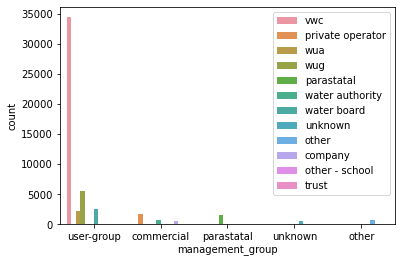

In [6]:
explore('management','management_group')
display(pump['management_group'].value_counts(normalize=True))
#nom['management_group'] = features[['management']]
#Target Encoding

Management Group fasst Management Attribute zusammen, management wird sollte als detailiertes Attribut beibehalten werden. Keine der beiden Spalten enthält fehlende Werte und sind die Ausprägungen sind haben keine Ordnung.

**payment**

payment         False
payment_type    False
dtype: bool

<AxesSubplot:xlabel='payment_type', ylabel='count'>

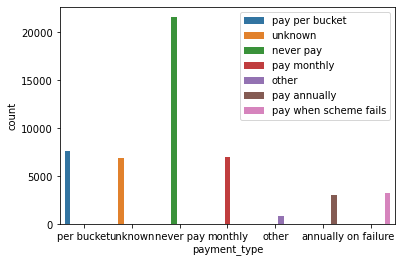

In [7]:

explore('payment', 'payment_type')
#nom['payment'] = features[['payment']]
#1:1 Zuweisung

Die Spalten payment und payment_type enthalten die selben Merkmale, sie sind identisch. Keine der Spalten enthält leere Werte und sie sind nominal skaliert.

**Water Quality**

water_quality    False
quality_group    False
dtype: bool

<AxesSubplot:xlabel='quality_group', ylabel='count'>

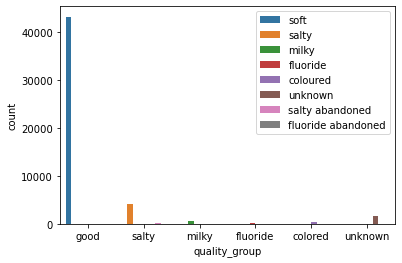

In [22]:
explore('water_quality', 'quality_group')
#nom['water_quality'] = features['water_quality']
#Zu Booleans umwandeln? Good True or False

quantity          False
quantity_group    False
dtype: bool

<AxesSubplot:xlabel='quantity_group', ylabel='count'>

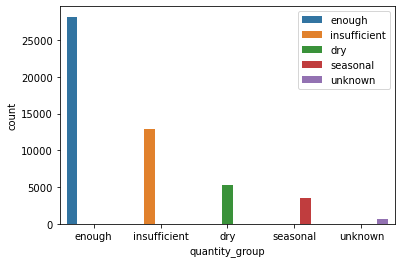

In [23]:
explore('quantity', 'quantity_group')
#nom['quantity'] = features['quantity']
#1:1 Zuweisbar

source         False
source_type    False
dtype: bool

<AxesSubplot:xlabel='source_type', ylabel='count'>

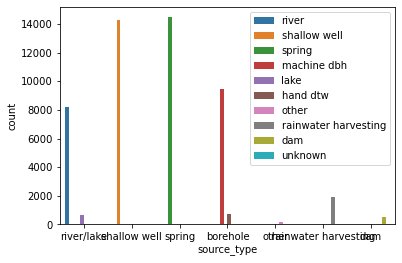

In [24]:
#source	source_type	source_class
explore('source', 'source_type')
#Beinahe 1:1 Zuweisung

source          False
source_class    False
dtype: bool

<AxesSubplot:xlabel='source_class', ylabel='count'>

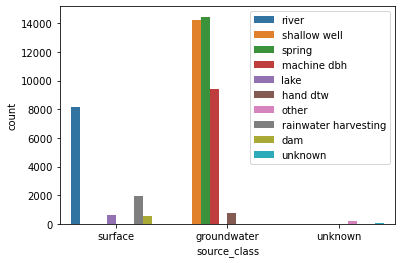

In [25]:
explore('source', 'source_class')
#nom['source'] = features['source']
#Starkes Ungleichgewicht zu Groundwater --> Aufteilung durch Source beibehalten

waterpoint_type          False
waterpoint_type_group    False
dtype: bool

<AxesSubplot:xlabel='waterpoint_type_group', ylabel='count'>

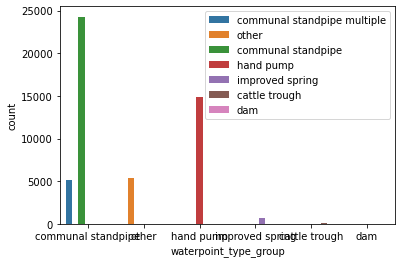

In [26]:
explore('waterpoint_type','waterpoint_type_group')
#nom['waterpoint_type'] = features['waterpoint_type']
#group erhöht das Ungleichgewicht , daher type beibehalten

#### Kategorie Encoding:
<br> https://contrib.scikit-learn.org/category_encoders/

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [9]:

def encoding_FL():
    encoder_1Hot = ce.OneHotEncoder()
    encoder_NBase = ce.BaseNEncoder()
    encoder_Binary = ce.BinaryEncoder()
    ce.BaseNEncoder(cols=['management','payment','water_quality', 'quantity','source','waterpoint_type'])
    features_1Hot = encoder_1Hot.fit_transform(nom)
    features_NBase = encoder_NBase.fit_transform(nom)
    return features_1Hot

In [29]:
#display(f1Hot = features_1Hot)
#display(features_1Hot.get_feature_names())
#display(features_NBase)

In [12]:


col_trans = ColumnTransformer(transformers =[
    ['1_hot_ec', ce.OneHotEncoder(), ['payment','water_quality', 'quantity','source','waterpoint_type']],
    ['target_ec', ce.TargetEncoder(), ['management']]
])


#pipe = make_pipeline(()'col_trans_FL', col_trans())
                    
pump = pd.read_csv('pump_train.csv')
test = pd.read_csv('pump_test.csv')
y =pump[['status_group']]
y = LabelEncoder().fit_transform(y)
X = pump[['management','payment','water_quality', 'quantity','source','waterpoint_type']]

X_1Hot =col_trans.fit_transform(X, y)
display(X_1Hot)
x_train, x_val, y_train, y_val = train_test_split(X_1Hot, y, test_size = 0.3, random_state = 0)

#display(x_train)

c:\Users\LordFabi\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
c:\Users\LordFabi\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
c:\Users\LordFabi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LordFabi\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.92263619],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.47883125],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.92263619],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.92263619],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.92263619],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.92263619]])

In [ ]:
#features = pd.concat([X_1Hot])


In [13]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)

In [84]:
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='weighted')
rec = recall_score(y_val, y_pred, average='weighted')

print('Accuracy: ', acc)
print('Precision: ', prec)
print('Recall: ', rec)

Accuracy:  0.7250280583613917
Precision:  0.7137908366639375
Recall:  0.7250280583613917


In [14]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_val)

c:\Users\LordFabi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='weighted')
rec = recall_score(y_val, y_pred, average='weighted')

print('Accuracy: ', acc)
print('Precision: ', prec)
print('Recall: ', rec)

Accuracy:  0.7063444906582161
Precision:  0.6716127294093539
Recall:  0.7063444906582161
